# Exercise set 8: Heterogeneous treatment effectts

In this exercise set we will be working with estimation of conditional average treatment effects assuming selection on observables. 

First we will use the `econml` package in Python to estimate a double machine learning causal forest, and in the second part we will use the `grf` package in R to estimate a causal forest.

In this exercise we will be using data from LaLonde, R. J. (1986). Evaluating the econometric evaluations of training programs with experimental data. The American economic review, 604-620, regarding a job training field experiment, where we will examine possible treatment effect heterogeneity treatment effects, downloaded from [NYU](https://users.nber.org/~rdehejia/nswdata.html) but supplied to you in `csv` format in a sligthly cleaned format. The object of interest is real earnings in 1978 and we assume selection on observables and overlap.

## Python

In this first part of the exercise, we will be utilizing Python and `econml`.

First we load some packages and the data.

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

np.random.seed(73)

plt.style.use('seaborn-whitegrid')

%matplotlib inline

df = pd.read_csv('nsw.csv', index_col=0)

df.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.415603,24.607092,10.272340,0.795745,0.107801,0.164539,0.774468,3116.271386,5586.166074
std,0.493176,6.666376,1.720412,0.403443,0.310350,0.371027,0.418229,5104.566478,6269.582709
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1122.621000,4159.919000
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,4118.681000,8881.665000
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660000,60307.930000


> **Exercise 1.1**
>
> Subset the treatment, outcome and covariates from the `DataFrame` as `T`, `y` and `X`, respectively
> 
>>*Hints:*
>> 
>> A `DataFrame` supports method `.drop()`, if one wishes to drop multiple columns at once. 

In [25]:
# Your answer here

In [26]:
### BEGIN SOLUTION

T = df.treat
y = df.re78
X = df.drop([ 'treat', 're78'], axis='columns')

### END SOLUTION

> **Exercise 1.2**
>
> Estimate a `CausalForest` using the `econml` package. Make sure that you use the splitting criterion as in the generalized random forest, but otherwise use default parameters.
> 
>>*Hints:*
>> 
>> The documentation for the `CausalForest` can be found [here](https://econml.azurewebsites.net/_autosummary/econml.grf.CausalForest.html)
>>
>> The splitting criterion is handled by the `criterion` parameter

In [27]:
# Your answer here

In [28]:
### BEGIN SOLUTION

from econml.grf import CausalForest
cf = CausalForest(criterion='het')
cf.fit(X, T, y)

### END SOLUTION

CausalForest(criterion='het')

> **Exercise 1.3**
>
> Predict out of bag estimates of the CATE, and create a histogram of these. Do you observe heterogeneity?
> 
>>*Hints:*
>> 
>> The documentation for the `CausalForest` can be found [here](https://econml.azurewebsites.net/_autosummary/econml.grf.CausalForest.html)
>>
>> Out of bag is sometimes shortened oob
>>
>> You can create a histogram using `sns.histplot`

In [29]:
# Your answer here

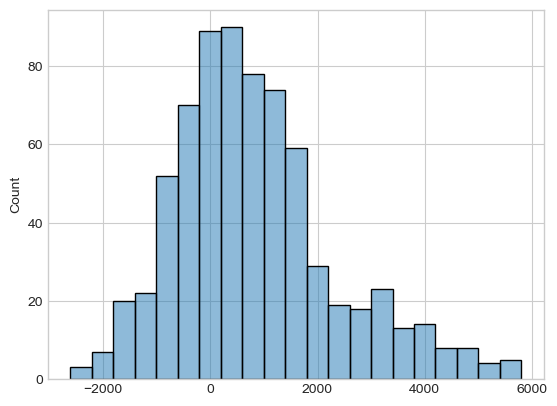

In [30]:
### BEGIN SOLUTION

tau_cf = cf.oob_predict(X)

sns.histplot(tau_cf, legend=False)
plt.show()

### END SOLUTION

> **Exercise 1.4**
>
> Estimate a `CausalForestDML` using the `econml` package. Make sure that you 1) use the splitting criterion as in the generalized random forest, 2) interpret the treatment as a discrete treatment and 3) estimate a thousand trees, but otherwise use default parameters. 
>
>>*Hints:*
>> 
>> The documentation for the `CausalForestDML` can be found [here](https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html)

In [31]:
# Your code here

In [32]:
### BEGIN SOLUTION

from econml.dml import CausalForestDML

cf_dml = CausalForestDML(
                        discrete_treatment=True,
                        n_estimators=1000,
                        criterion='het'
                        )
                        
cf_dml.fit(Y=y, T=T, X=X)

### END SOLUTION

> **Exercise 1.5**
>
> Report the doubly robust average treatment effect
>
>>*Hints:*
>> 
>> The documentation for the `CausalForestDML` can be found [here](https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html)
>>
>> A function which summarizes the model findings is available

In [33]:
# Your code here

In [34]:
### BEGIN SOLUTION

cf_dml.summary()

### END SOLUTION

Population summary results are available only if `cache_values=True` at fit time!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATE,805.679,487.542,1.653,0.098,-149.886,1761.244
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,808.062,473.896,1.705,0.088,-120.757,1736.881
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,802.328,965.46,0.831,0.406,-1089.938,2694.594


> **Exercise 1.6**
>
> Examine what variables drive the heterogeneity using the split based feature importance method.
>
>>*Hints:*
>> 
>> The documentation for the `CausalForestDML` can be found [here](https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html)
>>
>> The feature importances and feature names are available through a method

In [35]:
# Your code here

age        0.34
education  0.18
black      0.027
hispanic   0.013
married    0.046
nodegree   0.018
re75       0.37


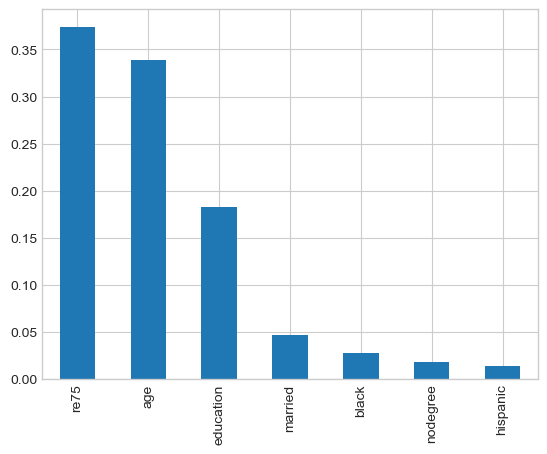

In [36]:
### BEGIN SOLUTION

# Variable name and importance, printed and unsorted 
for name, importance in zip (cf_dml.cate_feature_names(), cf_dml.feature_importances()):
    print(f"{name: <10} {importance:.2}")

# Sorted and plotted
importances = pd.Series(cf_dml.feature_importances(),index = X.columns).sort_values(ascending=False)
importances.plot.bar()
plt.show()

### END SOLUTION

> **Exercise 1.7**
>
> Calculate the SHAP values for the model.
>
>>*Hints:*
>> 
>> There's an example on the following [page](https://econml.azurewebsites.net/spec/interpretability.html)

In [37]:
# Your code here

In [38]:
### BEGIN SOLUTION

shap_values = cf_dml.shap_values(X)

### END SOLUTION

 97%|=================== | 681/705 [00:42<00:01]       

> **Exercise 1.8**
>
> Create a bar plot of the feature importance using SHAP values. Is the top variable the same as in the split based one?
>
>>*Hints:*
>> 
>> There's an example on the following [page](https://econml.azurewebsites.net/spec/interpretability.html)
>>
>> The summary plot has a `plot_type` parameter

In [39]:
# Your code here

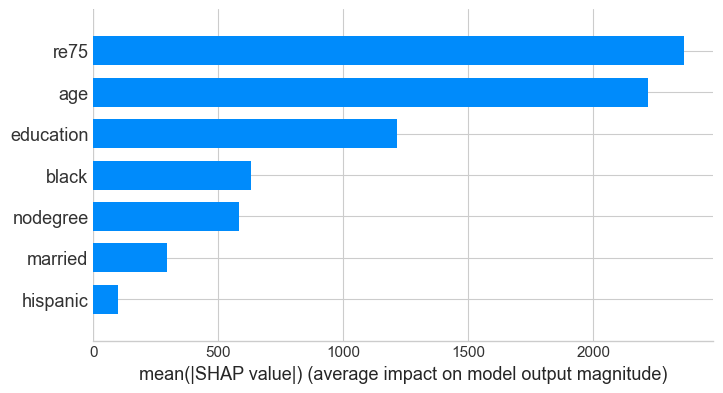

In [40]:
### BEGIN SOLUTION

import shap

unnested_shap_values = shap_values['re78']['treat_1']

shap.summary_plot(unnested_shap_values, plot_type="bar")

### END SOLUTION

> **Exercise 1.9**
>
> Create a summary plot of the feature importance using SHAP values. In what way does the top variable moderate the CATE?
>
>>*Hints:*
>> 
>> There's an example on the following [page](https://econml.azurewebsites.net/spec/interpretability.html)
>>
>> The feature value colourbar might disappear, in which the following to lines of code might help:
>>
>> `plt.gcf().axes[-1].set_aspect(100)`
>>
>> `plt.gcf().axes[-1].set_box_aspect(100)`

In [41]:
# Your code here

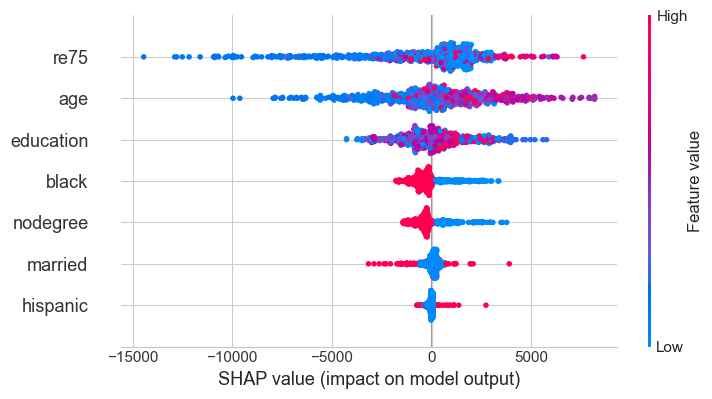

In [42]:
### BEGIN SOLUTION

shap.summary_plot(unnested_shap_values, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

### END SOLUTION

> **Exercise 1.10**
>
> Create a shallow decision tree of depth 2 to explain the CATE as a function of the inputs using `SingleTreeCateInterpreter`. Does the tree split on the variables you expected it to?
>
>>*Hints:*
>> 
>> There's an example on the following [page](https://econml.azurewebsites.net/spec/interpretability.html)


In [43]:
# Your code here

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


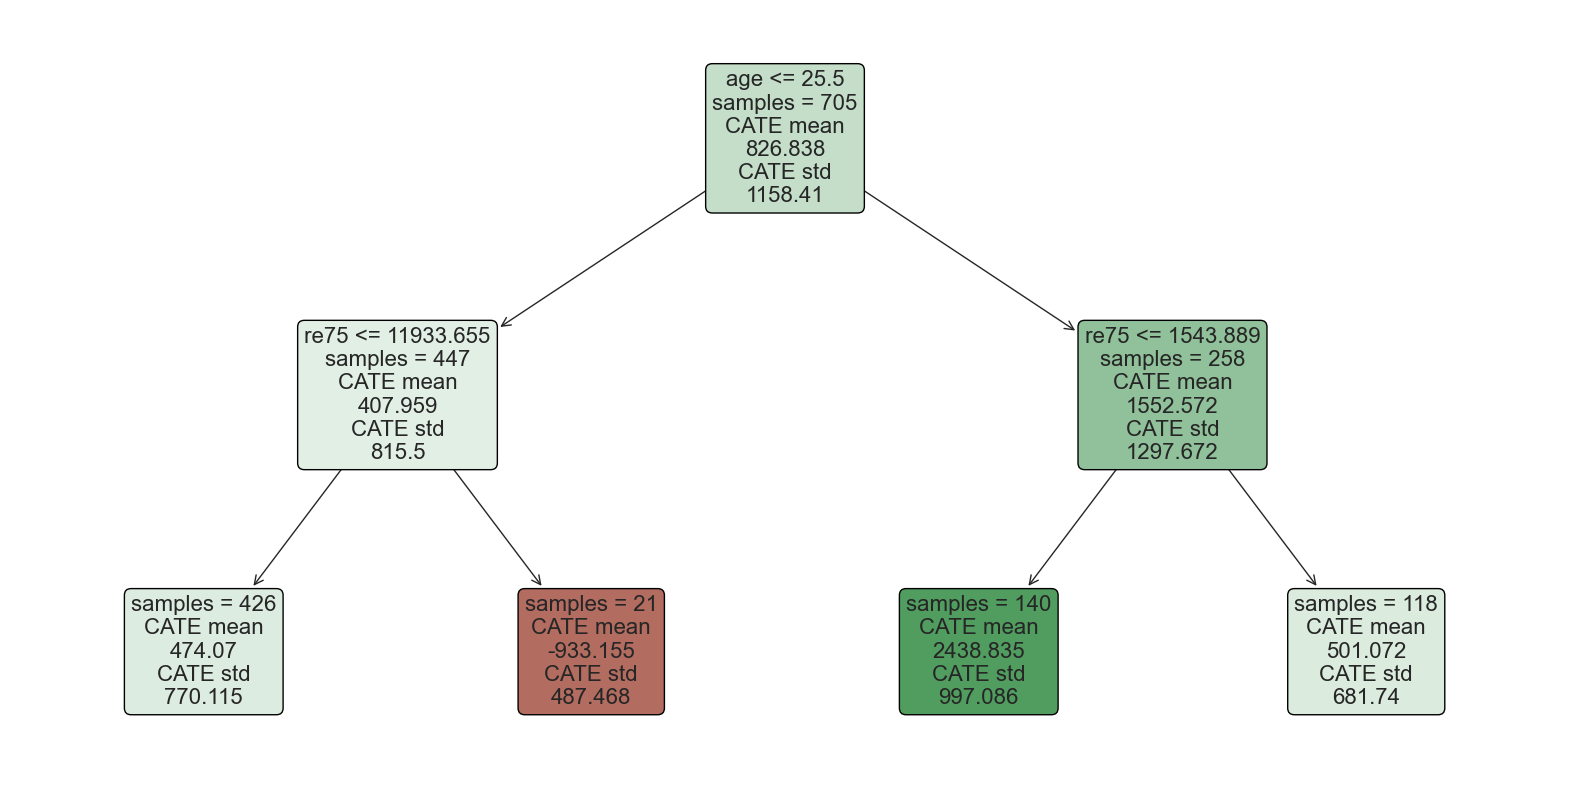

In [44]:
### BEGIN SOLUTION

from econml.cate_interpreter import SingleTreeCateInterpreter
%matplotlib inline
treeCATE = SingleTreeCateInterpreter(max_depth=2)
treeCATE.interpret(cf_dml, X)

fig, ax = plt.subplots(1, figsize=(20,10))
    
treeCATE.plot(ax=ax, fontsize= 16, feature_names=X.columns)

### END SOLUTION

> **Exercise 1.11**
>
> Create a shallow policy tree of depth 2 to explain the CATE as a function of the inputs using `SingleTreePolicyInterpreter`. Who does the model target?
>
>>*Hints:*
>> 
>> There's an example on the following [page](https://econml.azurewebsites.net/spec/interpretability.html)


In [45]:
# Your code here

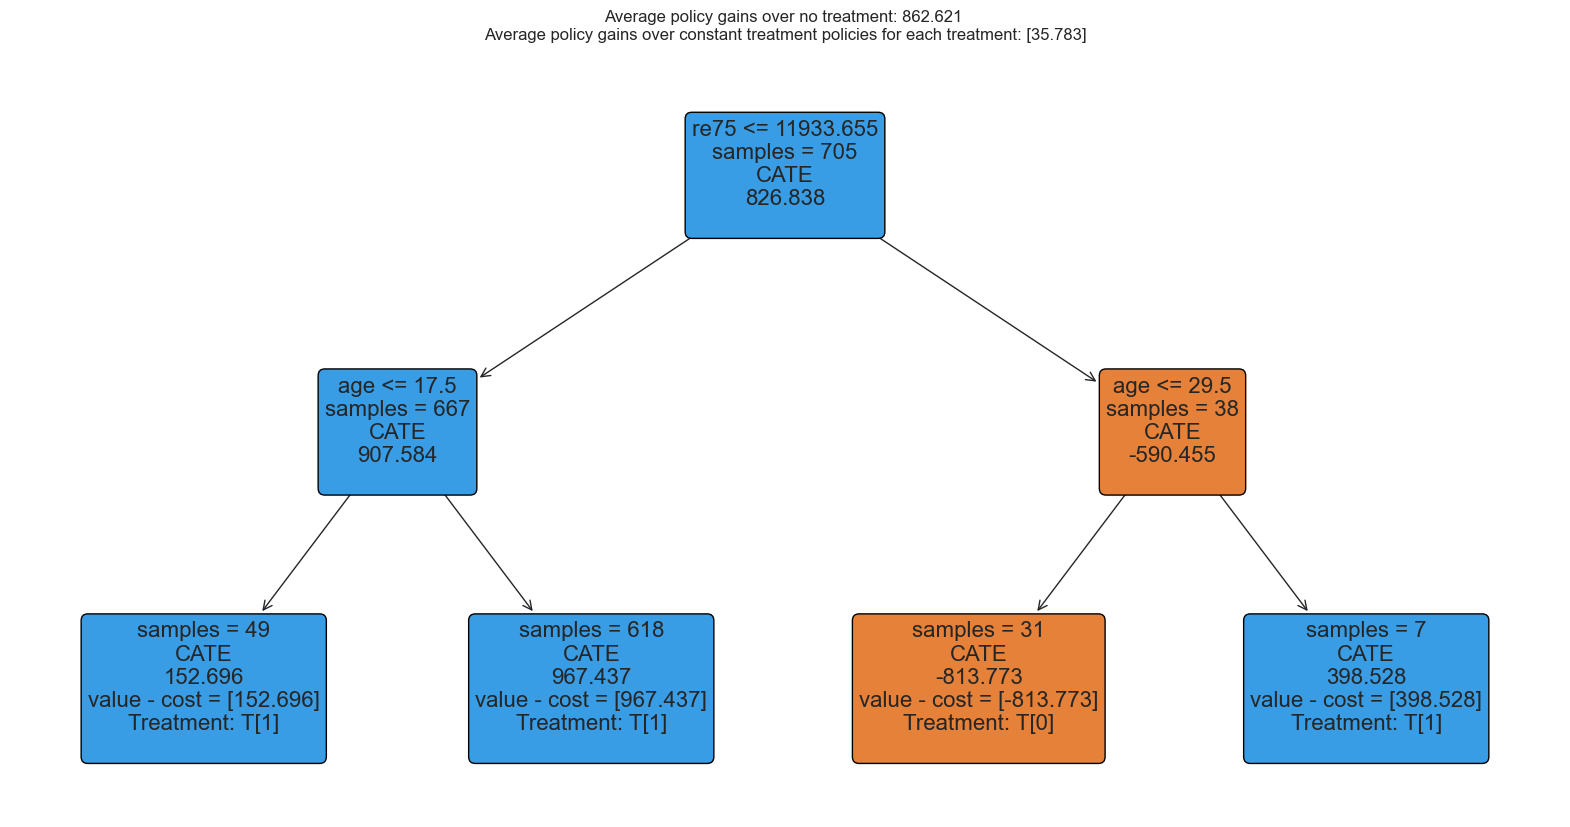

In [46]:
### BEGIN SOLUTION

from econml.cate_interpreter import SingleTreePolicyInterpreter
treePolicy = SingleTreePolicyInterpreter(max_depth=2)
treePolicy.interpret(cf_dml, X)

fig, ax = plt.subplots(1, figsize=(20,10))
    
treePolicy.plot(ax=ax, fontsize= 16, feature_names=X.columns)

### END SOLUTION

## R

In the second part of the exercise, we will be utilizing Python and `grf`. I will supply R code in code that has been commented out (# for code, ## for comments), and they will not be able to run in Python if you comment them in again. One can run R code in Python using `rpy2`, but I generally recommend using R and not `rpy2` due to the complexity of problem solving if `rpy2` fails.

The many different functions available in `grf` can be seen in their [reference](https://grf-labs.github.io/grf/reference/index.html) and they have a lot of great tutorials, accessible at the top of their page.

First we load the data.

In [47]:
#library(ggplot2)
#library(grf)

## Load data
# df = read.csv("nsw.csv")

## Subset target, treatment and covariates
#Y = df$re78
#W = df$treat
#X = subset(df, select= c(-treat, -re78, -X))

> **Exercise 2.1**
>
> Estimate a `causal_forest` using `grf`.
>
>>*Hints:*
>> 
>> There's documentation for `causal_forest` can be found [here](https://grf-labs.github.io/grf/reference/causal_forest.html)

In [48]:
### BEGIN SOLUTION

#cf = causal_forest(X, Y, W)

### END SOLUTION

> **Exercise 2.2**
>
> Assess the overlap assumption by creating a histogram of the estimated treatment propensities
> 
>>*Hints:*
>> 
>> An example can be seen [here](https://grf-labs.github.io/grf/articles/diagnostics.html)

In [49]:
### BEGIN SOLUTION

## Treatment propensities
#e.hat = cf$W.hat

## Plot
#hist(e.hat)

## Bounded away from 1 and 0, looks good

### END SOLUTION

![](overlap_test.png)

> **Exercise 2.3**
>
> Estimate the doubly robust average treatment effect. Do we find the same as previously?
> 
>>*Hints:*
>> 
>> Can you find a function for average treatment effect estimation in the reference?

In [50]:
### BEGIN SOLUTION

#average_treatment_effect(cf)

## Output
## estimate  std.err 
## 782.0347 508.0461 

# Approximately the same as before -- good!

### END SOLUTION

> **Exercise 2.4**
>
> Estimate out of bag CATE's
>
>>*Hints:*
>> 
>> How to predict with a forest can be seen [here](https://grf-labs.github.io/grf/reference/predict.causal_forest.html)

In [51]:
### BEGIN SOLUTION

## Calculate out-of-bag CATE
#tau.hat = predict(cf)$predictions

### END SOLUTION

> **Exercise 2.5**
>
> Test whether heterogeneity exists in the CATE's using the median split based test.
>
>>*Hints:*
>> 
>> An example can be seen [here](https://grf-labs.github.io/grf/articles/diagnostics.html)

In [52]:
### BEGIN SOLUTION

## Split on median
#high.effect = tau.hat > median(tau.hat)

## Calculate average treatment effects
#ate.high = average_treatment_effect(cf, subset = high.effect)
#ate.low = average_treatment_effect(cf, subset = !high.effect)

## Calculate difference and CI
#CATE_difference = ate.high[["estimate"]] - ate.low[["estimate"]] 
#CI = ate.high[["estimate"]] - ate.low[["estimate"]] +
#  c(-1, 1) * qnorm(0.975) * sqrt(ate.high[["std.err"]]^2 + ate.low[["std.err"]]^2)

## Report
#print(CATE_difference)
#print(CI)

## [1] 669.8228
## [1] -1340.735  2680.381

### END SOLUTION

> **Exercise 2.6**
>
> Test whether heterogeneity exists in the CATE's using the RATE. NOTE: Here we should do out of sample predictions, which I ignore in this exercise!
>
>>*Hints:*
>> 
>> How to estimate the RATE can be seen [here](https://grf-labs.github.io/grf/reference/rank_average_treatment_effect.html)

In [53]:
### BEGIN SOLUTION

## Calculate RATE
#rate = rank_average_treatment_effect(cf, tau.hat, target = "AUTOC")

## Results
#print(rate)
## estimate  std.err             target
## 29.55353 429.4161 priorities | AUTOC

### END SOLUTION

> **Exercise 2.8**
>
> Examine what variables drive the heterogeneity using the split based feature importance method.
>
>>*Hints:*
>> 
>> A function to calculate the variable importance can be found in the [grf reference](https://grf-labs.github.io/grf/reference/index.html)

In [54]:
### BEGIN SOLUTION

## Calculate variable importance
#varimp = variable_importance(cf)
## Print results
#print(varimp)
##           [,1]
##[1,] 0.29462337
##[2,] 0.15099209
##[3,] 0.03964410
##[4,] 0.01855247
##[5,] 0.07758364
##[6,] 0.02579878
##[7,] 0.39280555

## Same results as before, age and re75


### END SOLUTION

> **Exercise 2.9**
>
> Examine how the variables affect heterogeneity using the best linear projection.
>
>>*Hints:*
>> 
>> A function to estimate the best linear projection can be found in the [grf reference](https://grf-labs.github.io/grf/reference/index.html)

In [55]:
### BEGIN SOLUTION


## Rank vars and get best linear projection
#ranked.vars = order(varimp, decreasing = TRUE)
#best_lin_proj = best_linear_projection(cf, X[ranked.vars])

## Print results
#print(best_lin_proj)

## Results
## Best linear projection of the conditional average treatment effect.
##Confidence intervals are cluster- and heteroskedasticity-robust (HC3):
##
##               Estimate  Std. Error t value Pr(>|t|)   
##(Intercept) -5117.83175  5808.15316 -0.8811 0.378542   
##re75           -0.32801     0.10494 -3.1257 0.001847 **
##age            40.38223    80.12389  0.5040 0.614422   
##education     481.73107   383.02820  1.2577 0.208925   
##married      2617.70317  1420.71210  1.8425 0.065822 . 
##black         491.84656  1608.76159  0.3057 0.759902   
##nodegree      383.19631  1667.00113  0.2299 0.818259   
##hispanic     -818.57994  2099.72022 -0.3899 0.696765   
##---
##Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### END SOLUTION